In [1]:
from scipy import stats
import pandas as pd


# make a input DF with 2 features/columns with normal distribution and make another df of expected output containing 
#   expected class as 97% and class not occuring at 3% - Binary Classification

low = 0
high = 1
num_pop = 20

feature_1_array = stats.truncnorm.rvs(low, high,
                             loc = 0.5, scale = 0.1,
                             size = num_pop)
feature_2_array = stats.truncnorm.rvs(low, high,
                             loc = 0.6, scale = 0.25,
                             size = num_pop)
data = {'x1': feature_1_array, 'x2': feature_2_array}
input_data = pd.DataFrame(data = data)
expected_output_data = [0, 1]  # [0.03, 0.97]

[0.7281858225800159, 0.6480345311580447, 0.6089513080888024, 0.572901358194702, 0.5394483485018825, 0.5084273070748717, 0.479306649491988, 0.45239691162118356]


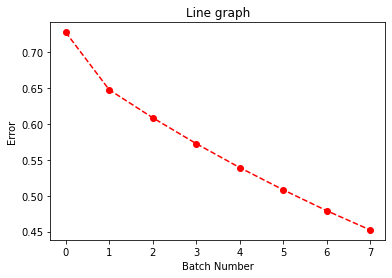

In [2]:
# Binary Classification Use Case
# 2 input features, 1 hidden layer with 2 nodes, 2 nodes in output layer
# Activation of sigmoid in all layers except the output layer. Output layer to have softmax

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from math import log

batch_size = 10
epochs = 4
learning_rate = 0.35
# we are implementing mini batch gradient descent here


class network_from_scratch:
    def __init__(self, ip_data, expected_output_data):
        self.input_data = input_data
        self.expected_output_data = expected_output_data
        initial_weights_vector = self.initialize_wt()
        weights_vector = len(initial_weights_vector) * [0]
        count = 0
        
        def update_weights(gradients, weights):
            return (weights-learning_rate*gradients)
        
        error_store = []
        for epoch_no in range(0, epochs):  # epoch
            for batch_no in range(0, self.input_data.shape[0], batch_size):  # batch
                self.input_data_batch = self.input_data.iloc[batch_no: batch_no+batch_size]
                gradient_vector = np.zeros([batch_size, len(initial_weights_vector)])
                error_vector = np.zeros([batch_size])
                for sample_no in range(0, batch_size):  # sample
                    input_data_sample = self.input_data_batch.iloc[sample_no].to_list()
                    if count == 0:
                        gradient_vector[sample_no], error_vector[sample_no] = \
                        (self.fpbp(input_data_sample, initial_weights_vector))  # returned gradients are added
                        count = 1
                    else:
                        gradient_vector[sample_no], error_vector[sample_no] = \
                        (self.fpbp(input_data_sample, weights_vector))  # returned gradients are added
                        
                gradient_vector_avg = gradient_vector.mean(axis=0)  # gradients are averaged after a batch is over.
                weights_vector = update_weights(gradient_vector_avg, weights_vector)  # weights updated after batch is over
                error = error_vector.mean()  # error for a batch is computed
                error_store.append(error)
                
        print(error_store)
        self.create_line_chart(error_store)
        
        
    def create_line_chart(self, data_for_y_axis):
        # data to be plotted
        x = [i for i in range(0, int(epochs*(num_pop/batch_size)))]
        x = np.array(x)
        y = np.array(data_for_y_axis)

        # plotting
        plt.title("Line graph")
        plt.xlabel("Batch Number")
        plt.ylabel("Error")
        plt.plot(x, y, color ="red", label='line with marker', linestyle='--', marker='o')
        plt.show()
    
    def compute_binary_cross_entropy_error(self, y1_pred):  # also called as log loss
        log_loss = -(self.expected_output_data[0] * log(y1_pred)) -((1-self.expected_output_data[0])*log(1-y1_pred))
        return log_loss

    def apply_activation_sigmoid(self, z):  
        sigma_activated_output = 1/(1+np.exp(-z))
        return sigma_activated_output

    def apply_activation_softmax(self, z_vector):   
        denominator = 0
        for i in z_vector:
            denominator += np.exp(i)
        
        for i in range(0, len(z_vector)):
            z_vector[i] = np.exp(z_vector[i])/denominator
        
        softmax_activated_output = z_vector
        return softmax_activated_output    
    
    def initialize_wt(self):
        return [np.random.sample(), np.random.sample(), np.random.sample(), np.random.sample(),
                np.random.sample(), np.random.sample(), np.random.sample(), np.random.sample()]
        
    def fpbp(self, sample, weights_vector):  # z_2_1 means it belongs to layer 2 and node 1
        z_2_1 = (weights_vector[0] * sample[0]) + (weights_vector[1] * sample[1])
        a_2_1 = self.apply_activation_sigmoid(z_2_1)
        z_2_2 = (weights_vector[2] * sample[0]) + (weights_vector[3] * sample[1])
        a_2_2 = self.apply_activation_sigmoid(z_2_2)

        z_3_1 = (weights_vector[4] * a_2_1) + (weights_vector[5] * a_2_2)
        z_3_2 = (weights_vector[6] * a_2_1) + (weights_vector[7] * a_2_2)
        a_3 = self.apply_activation_softmax([z_3_1, z_3_2])
        a_3_1, a_3_2 = a_3[0], a_3[1]

        y1_pred = a_3_1
        y2_pred = a_3_2
        
        # Concept required for backpropagation - log loss error which only needs y1_pred and not y2_pred is made of 2 components which are -y1logy1_pred 
        #   and -(1-y1)log(1-y1_pred). The second component can also be written as -y2log(y2). These 2 components can be 
        #   e1 and e2 which both add up to make e
        e = self.compute_binary_cross_entropy_error(y1_pred)
        
        # compute gradient of error w.r.t weights
        # The derivation of gradient formulas is done with pen and paper. A screenshot of same is attached below for ref.
        grad_e_w5 = (-expected_output_data[0] * (1-y1_pred) * a_2_1)
        grad_e_w6 = (-expected_output_data[0] * (1-y1_pred) * a_2_2)
        grad_e_w7 = (-expected_output_data[1] * (1-y2_pred) * a_2_1)
        grad_e_w8 = (-expected_output_data[1] * (1-y2_pred) * a_2_2)
        grad_e_w1 = (a_2_1 * (1-a_2_1) * sample[0]) * \
                    ((-expected_output_data[0] * (1-y1_pred) * weights_vector[4]) 
                     + (-expected_output_data[1] * (1-y2_pred) * weights_vector[6]))
        grad_e_w2 = (a_2_1 * (1-a_2_1) * sample[1]) * \
                    ((-expected_output_data[0] * (1-y1_pred) * weights_vector[4]) 
                     + (-expected_output_data[1] * (1-y2_pred) * weights_vector[6]))
        grad_e_w3 = (a_2_2 * (1-a_2_2) * sample[0]) * \
                    ((-expected_output_data[1] * (1-y2_pred) * weights_vector[7]) 
                     + (-expected_output_data[0] * (1-y1_pred) * weights_vector[5]))
        grad_e_w4 = (a_2_2 * (1-a_2_2) * sample[1]) * \
                    ((-expected_output_data[1] * (1-y2_pred) * weights_vector[7]) 
                     + (-expected_output_data[0] * (1-y1_pred) * weights_vector[5]))
        grad_vector_for_sample = [grad_e_w1, grad_e_w2, grad_e_w3, grad_e_w4, grad_e_w5, grad_e_w6, grad_e_w7, grad_e_w8]
        return grad_vector_for_sample, e
    
nw = network_from_scratch(input_data, expected_output_data)

# insights - 
# 1- binary cross entropy error or log loss penalizes values which are far from expected. 
# 2- softmax converts output predictions into relative preditions in such a way that both predictions add up to 1.

![p1.PNG](attachment:p1.PNG)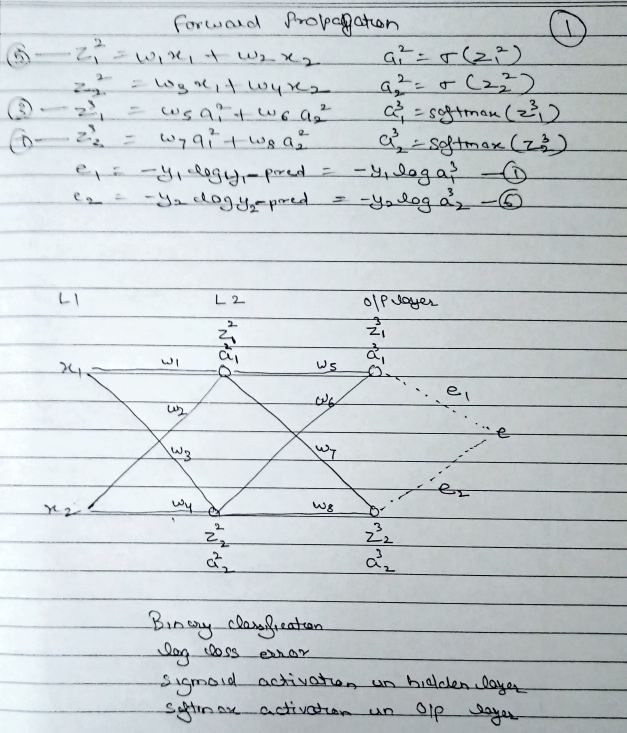

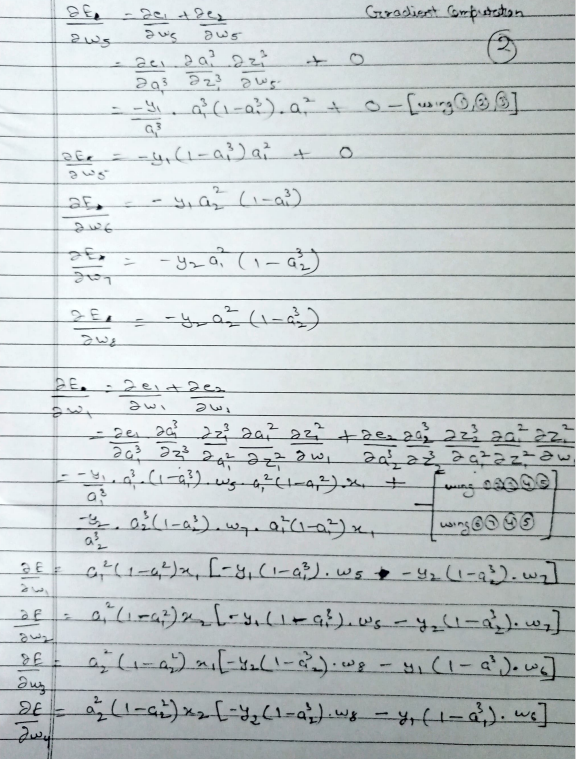

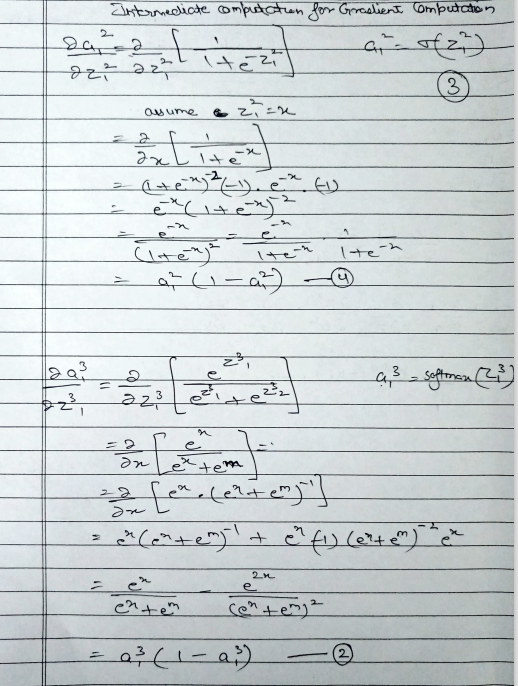